In [ ]:
Лабораторная работа №2.
Задание:
    Реализовать и исследовать математическую модель Вольтерра - Лотки для имитации межвидового взаимодействия.
    Сформулировать критерий "устойчивости" биологической системы на основе численности особей на произвольно 
    заданном интервале моделирования. Отыскать экстремум предложенного критерия как функции 4-х параметров модели.
За критерий устойчивости возьмем обеспечение минимальной разницы между двумя исследуемыми особями.

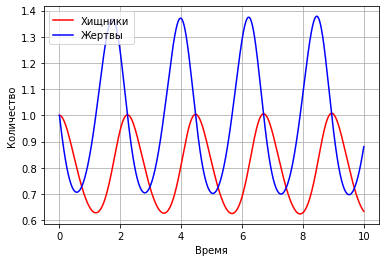

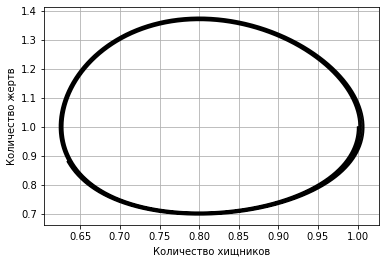

In [159]:
import matplotlib.pyplot as plt
import numpy as np
import math
from scipy.optimize import *

class Biome(object):

    def __init__(self, pred_init=1, prey_init=1, tmax=10, dt=0.001):
        self._dt = dt
        self._n_iters = int(tmax / dt)
        # Intial state
        self.pred_init = pred_init
        self.prey_init = prey_init
        # Data arrays
        self.time = None
        self.prey = None
        self.pred = None

    def run(self, alpha, beta, delta, gamma):
        """
        Simulation settings:
            alpha - prey growth
            beta - prey mortality
            delta - predator growrh
            gamma - predator mortality
        """
        self.time = np.zeros(self._n_iters)
        self.prey = np.zeros(self._n_iters)
        self.pred = np.zeros(self._n_iters)
        self.prey[0] = self.prey_init
        self.pred[0] = self.pred_init
        # Lotka-Volterra equations
        for i in range(self._n_iters - 1):
            self.prey[i + 1] = self.prey[i] + self._dt * self.prey[i] * (alpha - self.pred[i] * beta)
            self.pred[i + 1] = self.pred[i] + self._dt * self.pred[i] * (delta * self.prey[i] - gamma)
        self.time[1:] = np.add.accumulate([self._dt] * (self._n_iters - 1))
        return self.time, self.prey, self.pred

    def plot(self):
        plt.xlabel('Время')
        plt.ylabel('Количество')
        plt.plot(self.time, self.pred, label='Хищники', color='r')
        plt.plot(self.time, self.prey, label='Жертвы', color='b')
        plt.legend()
        plt.grid()
        plt.show()

    def plot_cycle(self):
        plt.xlabel('Количество хищников')
        plt.ylabel('Количество жертв')
        plt.plot(self.pred, self.prey, color='black')
        plt.grid()
        plt.show()

        
def main():
    biome = Biome(tmax=10)
    biome.run(4, 5, 2, 2)
    biome.plot()
    biome.plot_cycle()

#if __name__ == "__main__":
main()


Для выполнения критерия устойчивости были подобраны оптимальные параметры Alpha, Betta, Delta, Gamma.

In [164]:
def raz(param):
    sr_prey=0
    sr_pred=0
    alf=param[0]
    bet=param[1]
    delt=param[2]
    gam=param[3]
    biome = Biome(tmax=10)
    biome.run(alf,bet,delt,gam)
    raz=np.zeros(len(biome.prey))
    raz=abs(biome.prey-biome.pred)
    '''for i in range(0,len(biome.prey)):
        sr_prey+=biome.prey[i]
    sr_prey=sr_prey/len(biome.prey)
    for i in range(0,len(biome.pred)):
        sr_pred+=biome.pred[i]
    sr_pred=sr_pred/len(biome.pred)'''
    maxparam = max(raz)
    maxparam=maxparam/(max(biome.pred)+max(biome.prey))  
    return(maxparam)
solution = minimize(raz,[1,2,1,2])
print('Alpha=', solution.x[0])
print('Betta=', solution.x[1])
print('Delta=', solution.x[2])
print('Gamma=', solution.x[3])

Alpha= 1.5700607608216983
Betta= 1.6167259986357647
Delta= 1.7663095995686424
Gamma= 1.7155467815652292


Для подбора оптимальных параметров была использована функция minimize(). На вход она получает значение разработанной функции raz() и начальные значения параметров. В функции raz() были найдены максимальные значения разности между "хищниками" и "жертвами" для каждых параметров. Для обеспечения положительного числа особей значения разностей были модернизированы. С помощью функции minimize() было выбрано минимальное допустимое значение разности между "хищниками" и "жертвами".

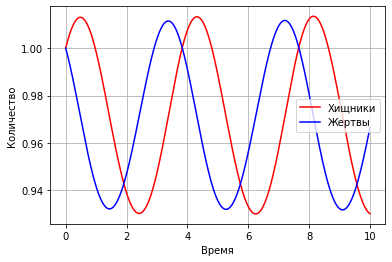

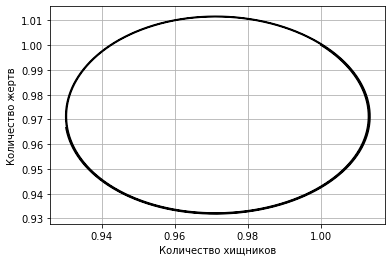

In [166]:
biome = Biome(tmax=10)
biome.run(solution.x[0],solution.x[1],solution.x[2],solution.x[3])
biome.plot()
biome.plot_cycle()